In [206]:
##Dependencies
import pandas as pd
import numpy
from citipy import citipy
import openweathermapy.core as owm
import time
import random
import matplotlib.pyplot as plt
from config import owm_key

In [128]:
##to run it elsewhere one can provide own access key
api_key = owm_key

In [159]:
## divided the Latitude to positvie and negative range to get maximum coverage on both sides of the Equator
latitude_pos = random.sample(range(0,90),90)
latitude_neg = random.sample(range(-90,0),90)
longitude = random.sample(range(-180,180),40)
## Creating a Dataframe to store all data
city_data=[{"City":"",
           "City Number":"",
           "Latitude" :"",
           "Longitude":"",
           "Temperature":"",
           "Humidity":"",
           "Cloudiness":"",
           "Wind Speed":""}]
city_data_df = pd.DataFrame(city_data)


In [173]:
##Looping thorugh positive and negative latitude separately
index =0
for x in latitude_pos:
    for y in longitude:
        try:
            city_data =citipy.nearest_city(x,y)
            city_data_df.loc[index,"City"] = city_data.city_name
            city_data_df.loc[index,"Country"] = city_data.country_code
            city_data_df.loc[index,"Latitude"] = x
            city_data_df.loc[index,"Longitude"] = y
        except:
            continue
        index = index +1
        
for i in latitude_neg:
    for j in longitude:
        try:
            city_data =citipy.nearest_city(i,j)
            city_data_df.loc[index,"City"] = city_data.city_name
            city_data_df.loc[index,"Country"] = city_data.country_code
            city_data_df.loc[index,"Latitude"] = i
            city_data_df.loc[index,"Longitude"] = j
        except:
            continue
        index = index +1

        
        
        
        

In [174]:
##removing the duplicate citites
city_data_df = city_data_df.drop_duplicates("City")

In [177]:
##taking a sample of cities with positive latitude as the number was large
city_data_df_1 = city_data_df.loc[city_data_df.Latitude > 0,:].sample(frac= .45)


In [182]:
##concatenating the DF for positive and negative latitue cities
city_data_df_final = pd.concat([city_data_df.loc[city_data_df.Latitude < 0,:],city_data_df_1])
city_data_df_final= city_data_df_final.reset_index(drop = True)

In [183]:
## making API calls to get the weather details for each city
settings = {"APPID": api_key, "units": "metric"}
for row in range(0,len(city_data_df_final)-1):
    time.sleep(.5)
    qry_str = city_data_df_final.loc[row,"City"] + "," + city_data_df_final.loc[row,"Country"]
    try:
        data =owm.get_current(qry_str,**settings)
        print("City name :"+ data["name"] + " City Id : " + str(data["id"]))
        city_data_df_final.loc[row,"City Number"] = data["id"]
        city_data_df_final.loc[row,"Latitude"] = data['coord']["lat"]
        city_data_df_final.loc[row,"Longitude"] = data['coord']["lon"]
        city_data_df_final.loc[row,"Humidity"] = data["main"]["humidity"]
        city_data_df_final.loc[row,"Temperature"] = data["main"]["temp"]
        city_data_df_final.loc[row,"Wind Speed"] =data["wind"]["speed"]
        city_data_df_final.loc[row,"Cloudiness"]=data["weather"][0]["main"]
        
    except:
        print("This City is not found in Weather map" + qry_str )
        continue
    

City name :Bulungu City Id : 2316259
City name :Hithadhoo City Id : 1282256
This City is not found in Weather maputiroa,ki
City name :Sampit City Id : 1628884
City name :Iquitos City Id : 3696183
City name :Dongobesh City Id : 160172
City name :Isaka City Id : 159045
City name :Lodja City Id : 211647
City name :Gamba City Id : 2400547
City name :Barranca City Id : 3946820
City name :Cabedelo City Id : 3404558
City name :Bandundu City Id : 2317397
City name :Mombasa City Id : 186301
This City is not found in Weather mapsanta ines,br
This City is not found in Weather mapbur gabo,so
City name :Uvira City Id : 204405
City name :Malindi City Id : 187968
City name :Maues City Id : 3395062
This City is not found in Weather mapsamusu,ws
City name :Padang City Id : 1633419
City name :Hermanus City Id : 3366880
City name :Te Anau City Id : 2181625
City name :Saint-Philippe City Id : 935215
City name :Pareora City Id : 2181133
City name :Jamestown City Id : 3370903
City name :Albany City Id : 207

City name :Iquique City Id : 3887127
City name :Beira City Id : 1052373
This City is not found in Weather mapandevoranto,mg
City name :Chipinge City Id : 893549
City name :Maun City Id : 933366
City name :Opuwo City Id : 3354077
This City is not found in Weather mapmarcona,pe
City name :Otavi City Id : 3353934
City name :Mocuba City Id : 1024312
City name :Bambui City Id : 3471005
City name :Miandrivazo City Id : 1059051
City name :Bulawayo City Id : 894701
City name :Morondava City Id : 1058381
City name :Fuerte Olimpo City Id : 3438102
City name :Le Port City Id : 935616
This City is not found in Weather mappalabuhanratu,id
City name :Hokitika City Id : 2206894
City name :Purranque City Id : 3874579
This City is not found in Weather mapkaramea,nz
City name :Ancud City Id : 3899695
This City is not found in Weather mapchissamba,ao
City name :Santa Ana City Id : 3939467
City name :Lichinga City Id : 1043893
City name :Sambava City Id : 1056899
City name :Nhulunbuy City Id : 2064735
Cit

City name :Butterworth City Id : 1014489
City name :Paysandu City Id : 3441243
City name :Torzhok City Id : 481985
City name :Linkuva City Id : 597440
City name :Sokolo City Id : 2450849
City name :Andujar City Id : 2521738
City name :Saint-Jean-de-Braye City Id : 2979341
City name :Nigde City Id : 303827
City name :Bedford City Id : 5897321
City name :Snihurivka City Id : 693379
City name :Kautokeino City Id : 779330
City name :Elizabeth City City Id : 4465088
This City is not found in Weather mapskagastrond,is
City name :Najran City Id : 103630
City name :Kaa-Khem City Id : 1500973
City name :Locri City Id : 2524371
City name :Moissala City Id : 2427697
This City is not found in Weather mappuerto lopez,co
City name :Umba City Id : 479071
City name :Reinosa City Id : 3112075
This City is not found in Weather mapkhonuu,ru
City name :Mglin City Id : 527217
City name :Ajaccio City Id : 6452235
City name :Kassala City Id : 372753
This City is not found in Weather mapwazzan,ma
City name :R

City name :Wajir City Id : 178443
City name :Galashki City Id : 874034
City name :Barbate City Id : 6356922
City name :Qaqortoq City Id : 3420846
City name :Matagami City Id : 6067747
City name :Constitucion City Id : 4011743
City name :Trencin City Id : 3057140
City name :Aneho City Id : 2367990
This City is not found in Weather mapkushmurun,kz
City name :Limoux City Id : 2998264
City name :Stromness City Id : 2636638
City name :Zaria City Id : 2317765
City name :Ridgecrest City Id : 5387494
City name :Hudiksvall City Id : 2704613
City name :Oistins City Id : 3373652
City name :Cerinza City Id : 3686918
City name :Ciudad Real City Id : 2519402
City name :Yoichi City Id : 2129218
City name :Ust-Nera City Id : 2120048
City name :Elk Grove Village City Id : 4890925
City name :Tromso City Id : 3133895
City name :Abha City Id : 110690
City name :Fort Nelson City Id : 5955902
City name :Jalu City Id : 86049
City name :Krasne City Id : 704277
City name :Tunceli City Id : 298846
City name :Py

City name :Kavaratti City Id : 1267390
City name :Korcula City Id : 3197710
City name :West Allis City Id : 5278420
City name :Novoleushkovskaya City Id : 518643
City name :Calvia City Id : 2520493
City name :Siderno City Id : 6540819
City name :Goundi City Id : 2431736
City name :Copaceni City Id : 680929
City name :Tabory City Id : 496285
This City is not found in Weather mapblonduos,is
City name :Alekseyevskaya City Id : 582817
City name :Butaritari City Id : 2110227
This City is not found in Weather mapattawapiskat,ca
City name :Porosozero City Id : 506232
City name :Mawlaik City Id : 1310120
City name :Danilov City Id : 567183
City name :Doba City Id : 2433437
City name :Mahdalynivka City Id : 702356
City name :Bardiyah City Id : 80509
City name :Azanka City Id : 1511146
City name :Kodiak City Id : 4407665
City name :Ardalstangen City Id : 3162970
City name :Araouane City Id : 2460954
City name :Kuroiso City Id : 2112077
City name :Ostrovskoye City Id : 514052
City name :Don Benit

In [187]:
city_data_df_test = city_data_df_final

In [188]:
## dropping all the city rows which do not have any weather data
city_data_df_final = city_data_df_final.dropna()

In [193]:
city_data_df_final.to_csv("Output.csv")

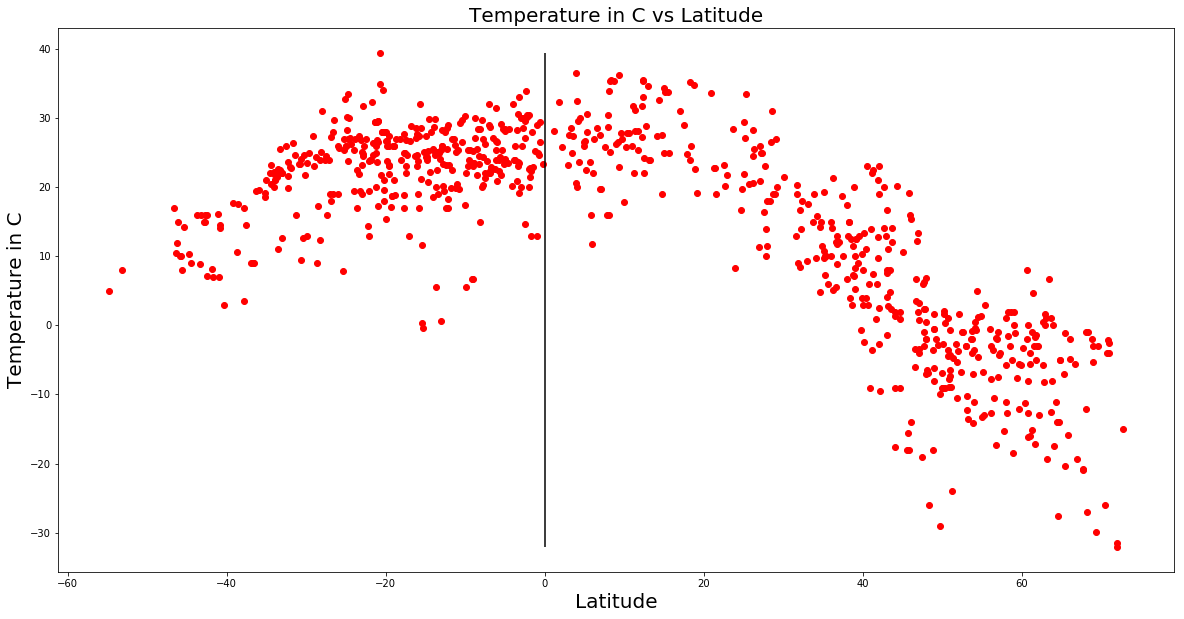

In [217]:
##Temperature (C) vs. Latitude
plt.figure(figsize =(20,10))
plt.scatter(city_data_df_final.loc[:,"Latitude"],city_data_df_final.loc[:,"Temperature"],marker = "o",color = "red")
min_temp = city_data_df_final.Temperature.min()
max_temp = city_data_df_final["Temperature"].max()
plt.title("Temperature in C vs Latitude",{'fontsize':20})
plt.xlabel("Latitude",{'fontsize':20})
plt.ylabel("Temperature in C",{'fontsize':20})
plt.vlines(0,min_temp,max_temp,linestyles ='solid')
plt.show()

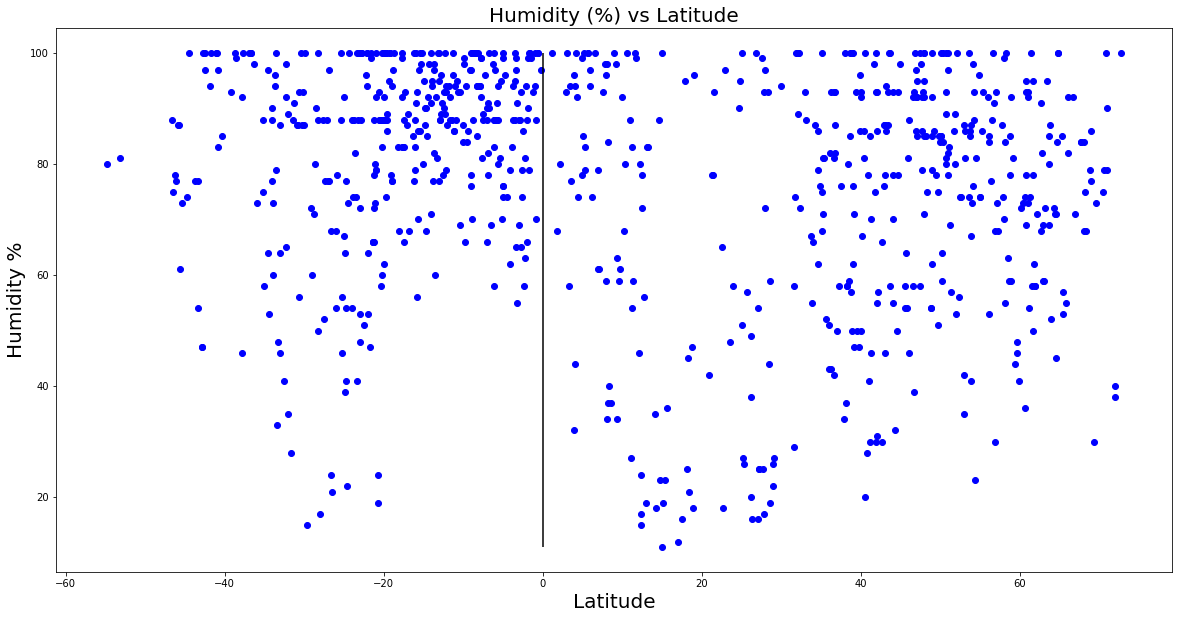

In [216]:
##Humidity (%) vs. Latitude
plt.figure(figsize =(20,10))
plt.scatter(city_data_df_final.loc[:,"Latitude"],city_data_df_final.loc[:,"Humidity"],marker = "o",color = "blue")
min_humidity = city_data_df_final.Humidity.min()
max_humidity = city_data_df_final["Humidity"].max()
plt.title("Humidity (%) vs Latitude",{'fontsize':20})
plt.xlabel("Latitude",{'fontsize':20})
plt.ylabel("Humidity %",{'fontsize':20})
plt.vlines(0,min_humidity,max_humidity,linestyles ='solid')
plt.show()

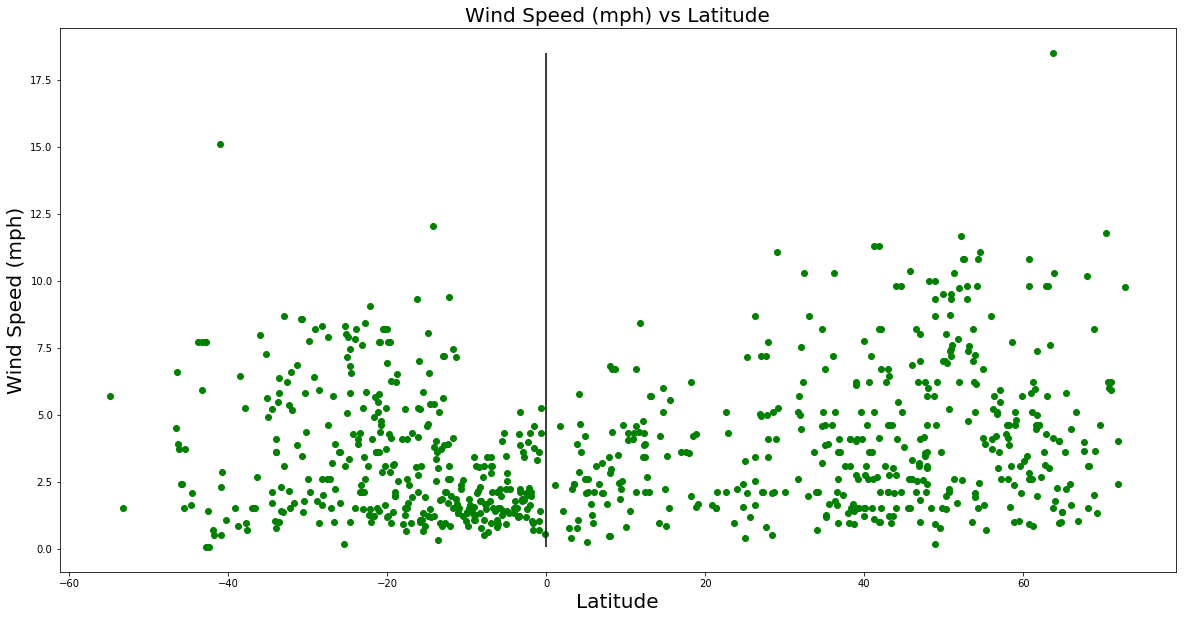

In [198]:
## Wind Speed (mph) vs. Latitude
plt.figure(figsize =(20,10))
plt.scatter(city_data_df_final.loc[:,"Latitude"],city_data_df_final.loc[:,"Wind Speed"],marker = "o",color = "green")
min_speed = city_data_df_final["Wind Speed"].min()
max_speed = city_data_df_final["Wind Speed"].max()
plt.title("Wind Speed (mph) vs Latitude",{'fontsize':20})
plt.xlabel("Latitude",{'fontsize':20})
plt.ylabel("Wind Speed (mph)",{'fontsize':20})
plt.vlines(0,min_speed,max_speed,linestyles ='solid')
plt.show()

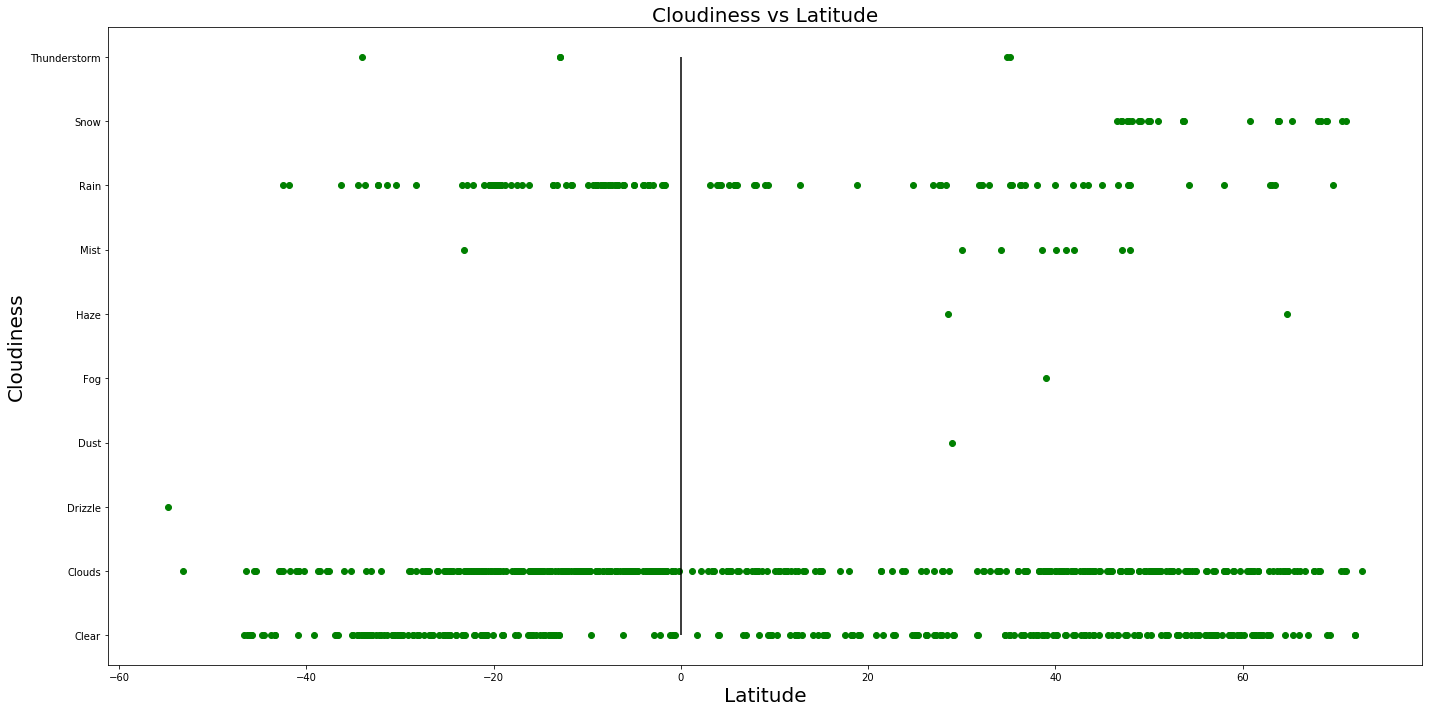

In [215]:
##Cloudiness (%) vs. Latitude
cloud= city_data_df_final["Cloudiness"].unique()
fig = plt.figure(figsize =(20,10))
plt.scatter(city_data_df_final.loc[:,"Latitude"],city_data_df_final.loc[:,"Cloudiness"],marker = "o",color = "green")
plt.title("Cloudiness vs Latitude",{'fontsize':20})
plt.xlabel("Latitude",{'fontsize':20})
plt.ylabel("Cloudiness",{'fontsize':20})
plt.vlines(0,'Clear','Thunderstorm',linestyles ='solid')
fig.tight_layout()
plt.show()